__Ejercicio 1:__ Resolver oscilador amortiguado:
$$m \ddot x=-k x -b \dot x,$$
usando $m=k=b=1$ y $x_0=1$, $\dot x_0=0$.
Usen Euler Y Runge-Kutta orden 4, comparen las soluciones, es decir, grafiquen el espacio de fase para cada método y despues juntos.


__Nota:__ El método de Runge-Kutta esta dentro de la familia de métodos simplécticos, es decir, preserva el volumen en el espacio de fase, algo particularmente útil cuanto tenemos sistemas que conservan la energia, a diferencia de _Euler_ que no lo hace. Observen que al no haber cantidades conservadas para el oscilador amortiguado, Euler funcione mucho mejor que en el otro caso, pues el oscilador amortiguado no conserva el volumen del espacio de fase.

__Respuesta 1:__
$$m \ddot x+k x +b \dot x=0,$$

Esto lo podemos solucionar con la chicharronera

$$l1=v=\frac{-1+\sqrt{3}i}{2}$$

$$l2=u=\frac{-1-\sqrt{3}i}{2}$$

Entonces la solucion es:

$$x(t)=A(e^{tu}+e^{tv})=\frac{2Acos(\frac{\sqrt{3}t}{2})}{e^\frac{t}{2}}$$


In [64]:
function MetodoRunge(f,alfa,betha, t0,h,N) #función para la aproximación mediante el método runge de cuarto grado
    T = []
    X = []
    Y = []
    t = t0
    x = alfa
    y = betha
    while t<=N
        push!(T,t)
        push!(X,x)
        push!(Y,y)
        k1=(f(t,x)) #K1,k2,k3,k4 son las fórmulas para calcular las constantes para el método
        k2=(f(t+(h/2),x+(h*k1/2)))#runge de 4 grado.
        k3=f(t+(h/2),x+(h*k2/2))
        k4=f(t+h,x+(h*k3))
        t=t+h #son los pasos de tiempo y es válido ya que son constantes.
        x= x + (h/6)*(k1+(2(k2+k3))+k4) #Es según la fórmula, una aproximación del método de runge
        y=f(t,x) #donde g es la funcion de velocidad para graficar el espacio fase.
    end
    plot(X,Y,color="brown") #grafico x vs y
end

MetodoRunge (generic function with 2 methods)

In [2]:
using PyPlot

In [3]:
function f(t,x)
    a=cos(0.866*t)+(1.732*sin(0.866*t))
    b=e^(t/2)
    c=(-a)/b
    return c
end

f (generic function with 1 method)

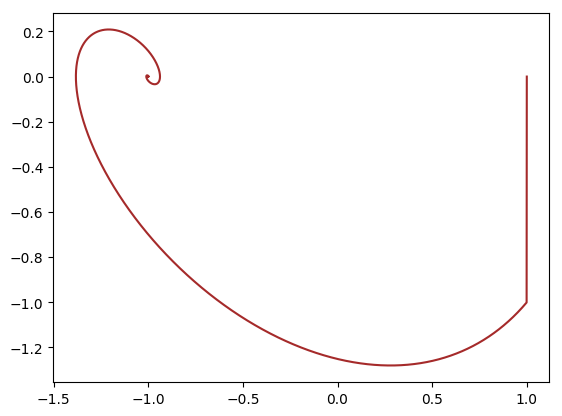

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fee4dcdf6d0>

In [6]:
MetodoRunge(f,1,0,0,0.001,100)

In [7]:
function eulerMethod(f,alfa,betha,t0,h,N) #voy a implementar el metodo numerico de euler para ec. diferenciales
    T = [] #en estos arreglos vacios guardaré mis pasos de tiempo t
    W = []#aqui guardare los x obtenidos en cada iteracion
    Y=[]
    t=t0 #es mi valor inicial de t
    w = alfa#es mi valor inicial de x
    y=betha#es mi valor inicial de Y
    while t<=N #si t aun no llega al valor que quiero que llegue, entra al ciclo
        push!(T,t) #guarda el valor de t en T
        push!(W,w) #guarda el valor de x en W
        push!(Y,y)
        t=t+h
        s=f(t,w)#la ec diferencial de primer orden está igualada a una funcion f y aca se evalua nuestro valor anterior de t y x
        w = w + h*s #recalculamos x
        y=f(t,w)
    end  
    plot(W,Y,color="pink") #graficamos t vs x
end

eulerMethod (generic function with 1 method)

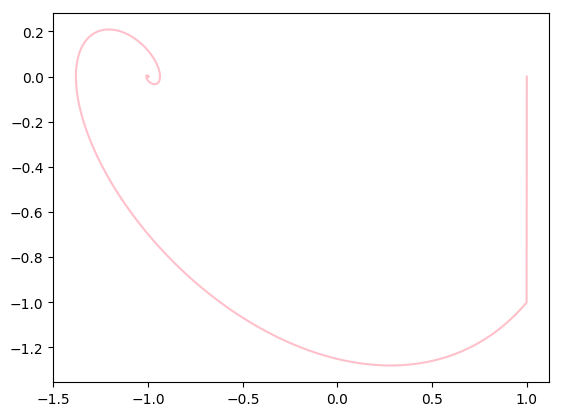

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fee4dba6810>

In [8]:
eulerMethod(f,1,0,0,0.001,100)

In [9]:
function EspacioFaseJuntos1(f,alfa,betha,t0,h,N)
    eulerMethod(f,alfa,betha,t0,h,N)
    MetodoRunge(f,alfa,betha, t0,h,N)
end

EspacioFaseJuntos1 (generic function with 1 method)

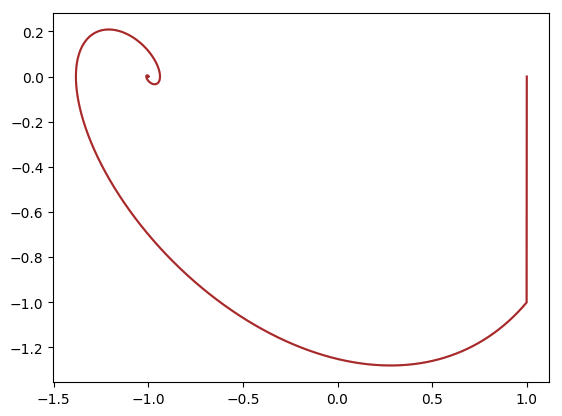

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fee4daef2d0>

In [10]:
EspacioFaseJuntos1(f,1,0,0,0.001,100)

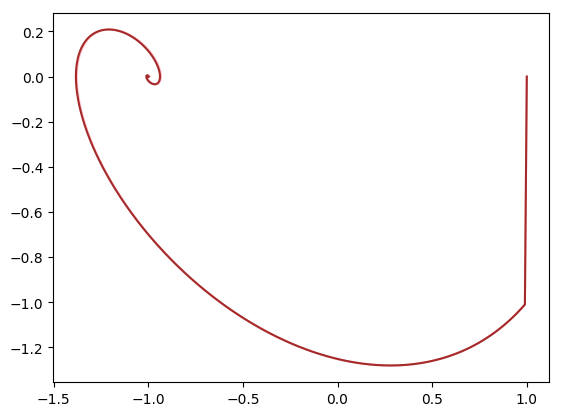

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fee4da2bdd0>

In [11]:
EspacioFaseJuntos1(f,1,0,0,0.01,100)

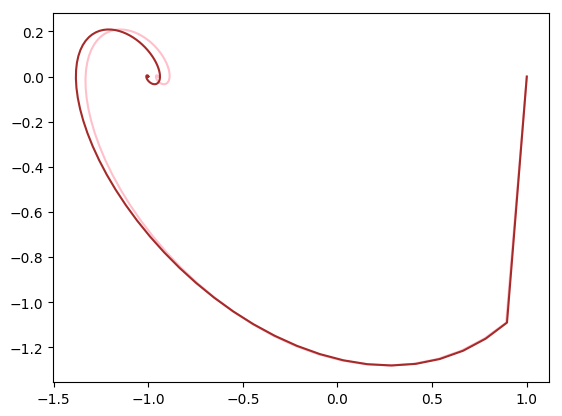

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fee4d975850>

In [12]:
EspacioFaseJuntos1(f,1,0,0,0.1,100)

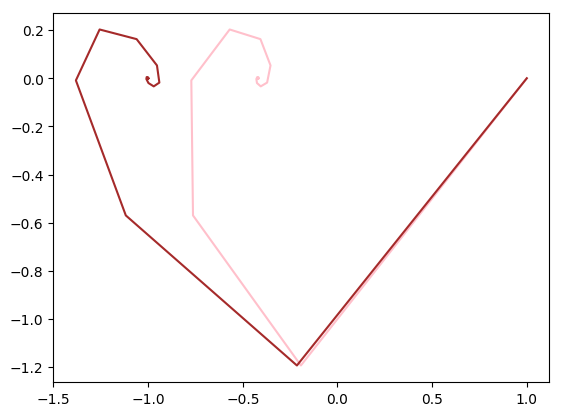

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fee4d8c12d0>

In [13]:
EspacioFaseJuntos1(f,1,0,0,1,100)

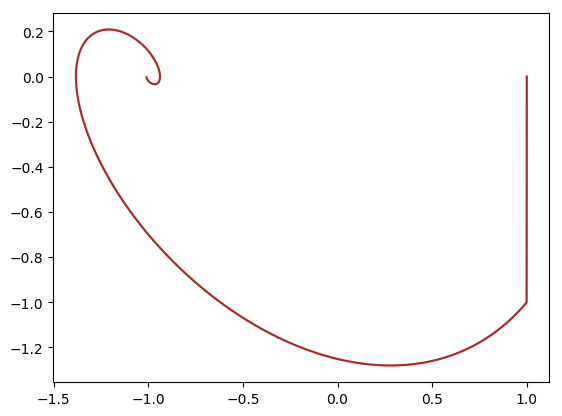

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fee4daef9d0>

In [14]:
EspacioFaseJuntos1(f,1,0,0,0.001,10)

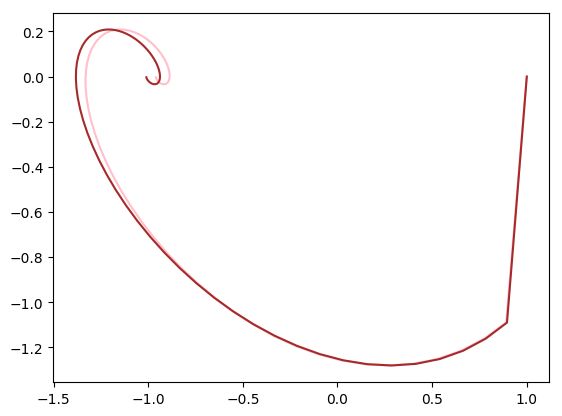

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fee4d743390>

In [15]:
EspacioFaseJuntos1(f,1,0,0,0.1,10)

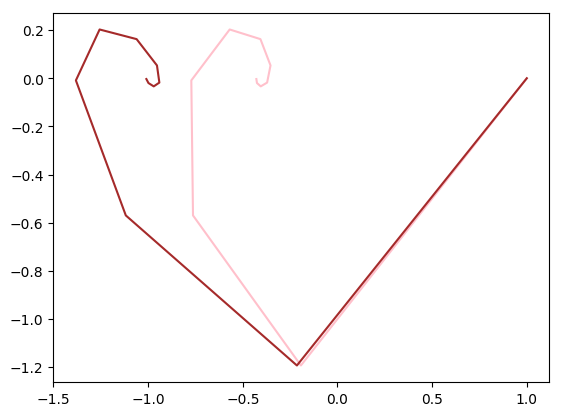

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fee4d67fdd0>

In [16]:
EspacioFaseJuntos1(f,1,0,0,1,10)

__Ejercicio 2:__ Resolver el péndulo simple:
$$l \ddot\theta=-g \sin(\theta),$$
usando Runge-Kutta orden 4. Gráficar muchas condiciones iniciales (lo mas facil es que sean aleatorias) en el espacio de fase usando $l=g=1$. Ajuste el rango de la gráfica para que se centre cerca del cero para que se puedan observar los dos tipos de movimiento presentes. Coménte e interprete las soluciones.

__Respuesta:__
$$\theta(t)=sin(t\omega)\alpha$$

Donde

$$\omega=\sqrt{\frac{g}{l}}$$

$\alpha=\theta0$ o condicion inicial

En este caso $\omega=1$

Entonces

$$\dot\theta=\alpha cos(t)$$


In [39]:
function MetodoRunge2(h,N) #función para la aproximación mediante el método runge de cuarto grado
    #a diferencia de los runge anteriores aca cuando t=0; tetha es 0 y tetha punto es tetha cero; esto por la suposición 
    #de que g=l entonces w=1.
    j=(N/h)+1
    T=linspace(0,N,j)
    X = []
    t = 0
    x = 0
    for i in 1:10 #porque solo graficare con 10 condiciones inciales
        A=rand(1)
        while t<=N
        push!(X,x)
            #Aca a diferencia de los otros runge, para no tener que estar modificando f por la condicion inicial, simplemente declare la f(t)=Acos(t), pero en vez de poner f(t), puse directo el Acos(t)
        k1=A*cos(t) #K1,k2,k3,k4 son las fórmulas para calcular las constantes para el método
        k2=A*cos(t+(h/2))#runge de 4 grado.
        k3=A*cos(t+(h/2))
        k4=A*cos(t+h)
        t=t+h #son los pasos de tiempo y es válido ya que son constantes.
        x= x + (h/6)*(k1+(2(k2+k3))+k4) #Es según la fórmula, una aproximación del método de runge
        end
         y=A.*cos(T) #donde g es la funcion de velocidad para graficar el espacio fase.
   plot(X,y) #grafico x vs y
    #plot(T,y)
    end
end

MetodoRunge2 (generic function with 3 methods)

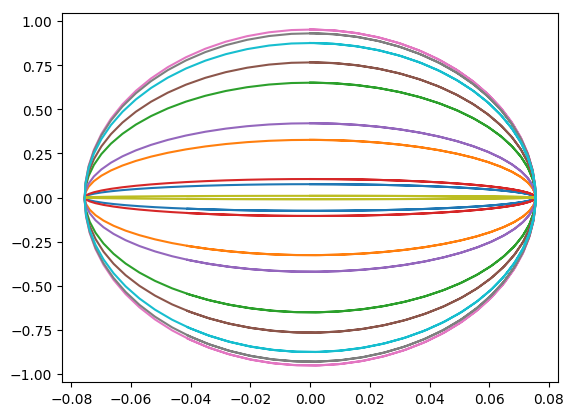

In [40]:
MetodoRunge2(0.1,10)

__Ejercicio 3:__ Comprobar numéricamente (con Runge-Kutta orden $4$) que en el sistema:
$$\frac{dx}{dt}=x^2-1,$$
hay dos _puntos fijos_, ubicados en $1$ y $-1$, compruebe además que el $1$ es un _repulsor_ y el $-1$ un _atractor_. Para hacer esto necesitará graficar muchas condiciones iniciales, generelas aleatoriamente y gráfiquelas en el espacio $(x(t),t)$.

__Respuesta:__
Solucionándolo se obtiene que 
Se hizo por sep de variable:

$$x(t)=\frac{e^{2t}+c}{c-e^{2t}}$$

Donde c está dado por la condicion inicial y sería equivalente a    $c=e^{2x0}$

y    $\dot{x}$    es:

$$\dot{x}=\frac{4ce^{2t}}{(c-e^{2t})^2}$$

In [60]:
function MetodoRunge3(f,alfa,h,N) #función para la aproximación mediante el método runge de cuarto grado
 for i in 1:5 #habrá 5 gáficas distintas
            T = []
    X = []
        a=rand(linspace(1,alfa,101)) #escogere un numero aleatorio entre 1 y alfa
        println(a)
    t = a+h #x se indetermina cuando t=a por eso mi primer valor de t sera a+h
        #println("  ",t)
    x = (1+e^(2*h))/(1-e^(-2*h)) #x=-1/t
    #x3=linspace(t,N,10000)
    #y3=map(x-> (((e^(2*x))+e^(2*a))/((e^(2*a))-(e^(2*x)))),x3)
    #plot(x3,y3)
    while t<=N
        push!(T,t)
        push!(X,x)
        k1=(f(t,x,a)) #K1,k2,k3,k4 son las fórmulas para calcular las constantes para el método
        k2=(f(t+(h/2),x+(h*k1/2),a))#runge de 4 grado.
        k3=f(t+(h/2),x+(h*k2/2),a)
        k4=f(t+h,x+(h*k3),a)
        t=t+h #son los pasos de tiempo y es válido ya que son constantes.
        x= x + (h/6)*(k1+(2(k2+k3))+k4) #Es según la fórmula, una aproximación del método de runge
    end
    plot(T,X) #grafico t vs x
    end
end

MetodoRunge3 (generic function with 1 method)

In [56]:
function f3(t,x,a)
    c=e^(2*a)
    A=4*c*(e^(2*t))
    B=(c-(e^(2*t)))^2
    return A/B
end

f3 (generic function with 1 method)

4.5


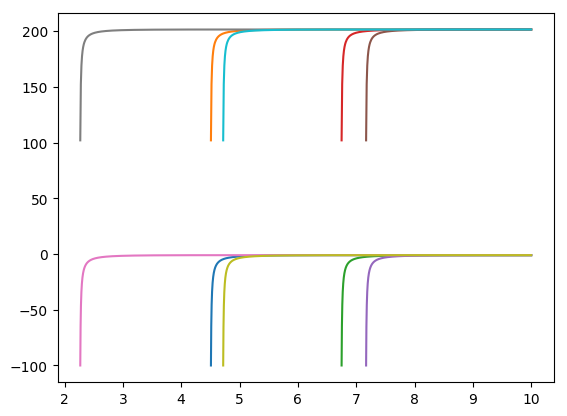

6.74
7.16
2.26
4.71


In [59]:
MetodoRunge3(f3,8,0.01,10) #Aca tiene la comparacion entre las funciones reales y la aprox

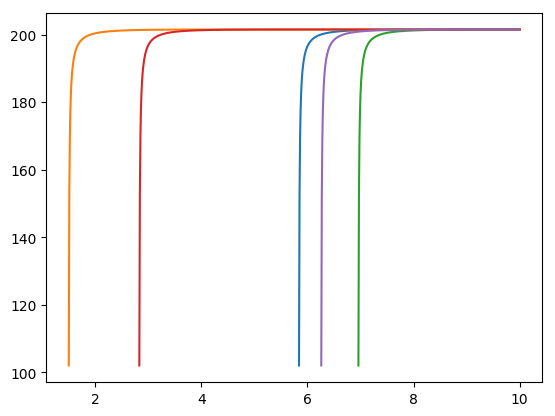

5.83
1.49
6.95
2.82
6.25


In [61]:
MetodoRunge3(f3,8,0.01,10) #aca todas son aproximaciones

__Ejercicio 4:__ También con Runge-Kutta orden $4, $Resuelva numéricamente el sistema:
$$\frac{dx}{dt}=x^2,$$
cual es el punto fijo único?, es un _atractor_ o un _repulsor_?. Utilice de igual forma muchas condiciones iniciales y gráfiquelas en el mismo espacio que en el ejercicio anterior.

In [11]:
function f4(t,x,a)
    return (a^2)/((1-(a*t))^2)
end

f4 (generic function with 2 methods)

In [54]:
function MetodoRunge4(f,alfa,h,N) #función para la aproximación mediante el método runge de cuarto grado
 for i in 1:5 #habrá 5 gáficas distintas
            T = []
    X = []
        a=rand(linspace(1,alfa,101)) #escogere un numero aleatorio entre 1 y alfa
        println(a)
    t = (1/a)+h #x se indetermina cuando t=1/a por eso mi primer valor de t sera 1/a+h
        #println("  ",t)
    x = -1/t #x=-1/t
    #x3=linspace(t,N,10000)
    #y3=map(x-> (a/(1-(a*x))),x3)
    #plot(x3,y3)
    while t<=N
        push!(T,t)
        push!(X,x)
        k1=(f(t,x,a)) #K1,k2,k3,k4 son las fórmulas para calcular las constantes para el método
        k2=(f(t+(h/2),x+(h*k1/2),a))#runge de 4 grado.
        k3=f(t+(h/2),x+(h*k2/2),a)
        k4=f(t+h,x+(h*k3),a)
        t=t+h #son los pasos de tiempo y es válido ya que son constantes.
        x= x + (h/6)*(k1+(2(k2+k3))+k4) #Es según la fórmula, una aproximación del método de runge
    end
    plot(T,X) #grafico t vs x
    end
end

MetodoRunge4 (generic function with 2 methods)

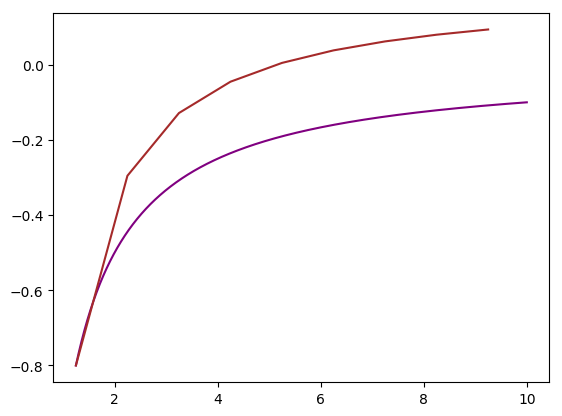

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f757150af90>

In [21]:
MetodoRunge4(f4,4,1,10) #este runge fue el original probado para la funcion

2.86


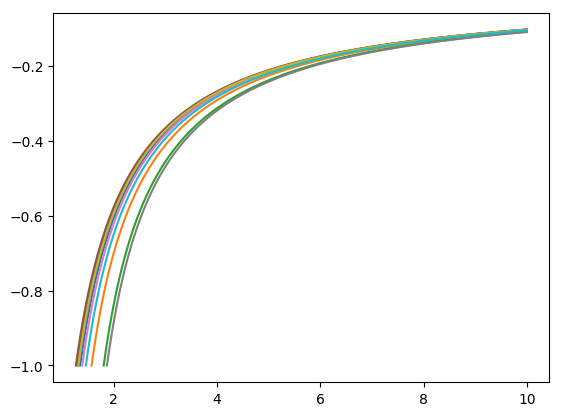

1.75
1.24
3.4
3.16
3.73
2.56
1.15
3.19
2.17


In [28]:
MetodoRunge4(f4,4,1,10) #este runge fue modificado solo para que imprima la funcion, no apoximaciones.

6.22  0.26077170418006435
3

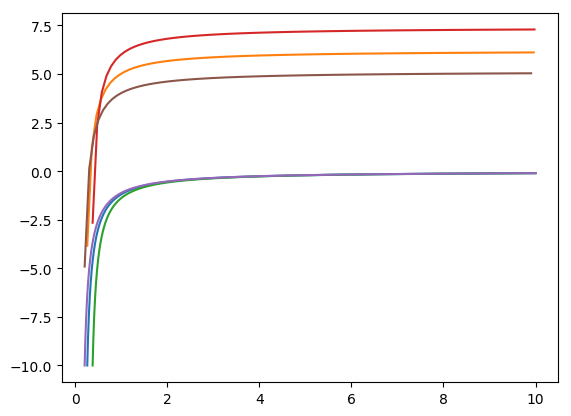

.39  0.3770083102493075
9.64  0.2037344398340249


In [48]:
MetodoRunge4(f4,10,0.1,10) #Aqui es la comparacion de mi aprox y la funcion real

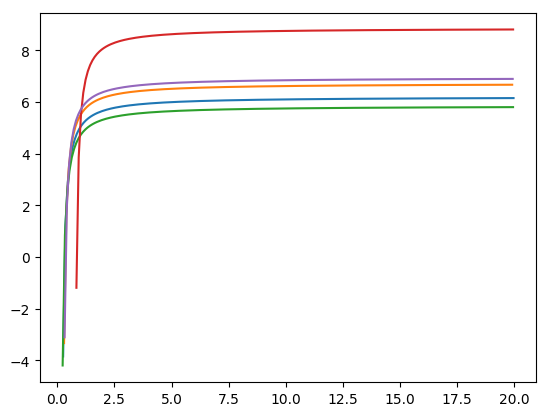

6.25
4.99
7.23
1.35
4.5


In [55]:
MetodoRunge4(f4,8,0.1,20)

__Ejercicio 5:__ Resolver con Runge-Kutta orden $4$ el sistema de ecuaciones:
$$\frac{d\vec x}{dt}=\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)\vec x,$$
donde $\vec x= \left(x(t),y(t)\right)^{\text{T}}.$
Grafique los espacios de fase tomando muchas condiciones iniciales aleatorias y fijando los rangos de los ejes alrededor del origen, de tal forma que se aprecie el compotamiento de las soluciones. Haga esto para los sistemas con:
* $a=c=1$, $b=d=0$
* $a=c=-1$, $b=d=0$
* $a=1$, $b=-2$, $c=d=0$
* $a=1$, $b=-0.5$, $c=d=0$
* $a=d=0$, $b=-c=1$
* $a=d=1$, $b=-c=1$
* $a=d=-1$, $b=-c=1$
* $a=d=-1$, $b=-c=-1$
* $a=b=1$, $b=4,c=-2$
* $a=b=d=-1$, $c=0$

In [65]:
function f5(t,x1,x2,a,b)
    xpr1=(a*x1)+(b*x2)
    return (xpr1)
end

f5 (generic function with 1 method)

In [64]:
function f52(t,x1,x2,c,d)
    xpr2=(c*x1)+(d*x2)
    return (xpr2)
end

f52 (generic function with 1 method)

In [69]:
function MetodoRunge5(f,alfa,betha,t0,h,N,a,b,c,d) #función para la aproximación mediante el método runge de cuarto grado
    T = []
    X1 = []
    X2=[]
    Y1 = []
    Y2=[]
    t = t0 #es el t inicial
    x1 = alfa #es el x1 inicial
    x2 = betha #es el x2 inicial
    y1 = (a*x1)+(b*x2) #calculo y1 inicial
    y2=(c*x1)+(d*x2) #calculo y2 inicial
    while t<=N
        push!(T,t)
        push!(X1,x1)
        push!(X2,x2)
        push!(Y1,y1)
        push!(Y2,y2)
        #se necsita calcular dos grupos de k para calcular cada x1 y x2
        k1=(f(t,x1,x2,a,b)) #K1,k2,k3,k4 son las fórmulas para calcular las constantes para el método
        k2=(f(t+(h/2),x1+(h*k1/2),x2+(h*k1/2),a,b))#runge de 4 grado.
        k3=f(t+(h/2),x1+(h*k2/2),x2+(h*k2/2),a,b)
        k4=f(t+h,x1+(h*k3),x2+(h*k3),a,b)
        K1=(f(t,x1,x2,c,d)) #K1,k2,k3,k4 son las fórmulas para calcular las segundas constantes para el método
        K2=(f(t+(h/2),x1+(h*K1/2),x2+(h*K1/2),c,d))#runge de 4 grado.
        K3=f(t+(h/2),x1+(h*K2/2),x2+(h*K2/2),c,d)
        K4=f(t+h,x1+(h*K3),x2+(h*K3),c,d)
        t=t+h #son los pasos de tiempo y es válido ya que son constantes.
        x1= x1 + (h/6)*(k1+(2(k2+k3))+k4)
        x2= x2 + (h/6)*(K1+(2(K2+K3))+K4)#Es según la fórmula, una aproximación del método de runge
        y1=f(t,x1,x2,a,b) #donde g es la funcion de velocidad para graficar el espacio fase.
        y2=f(t,x1,x2,c,d)
    end
    plot(X1,Y1,color="brown") #grafico x1 vs y1 estado fase
    plot(X2,Y2,color="purple") #grafico x1 vs y1 estado fase
end

MetodoRunge5 (generic function with 2 methods)

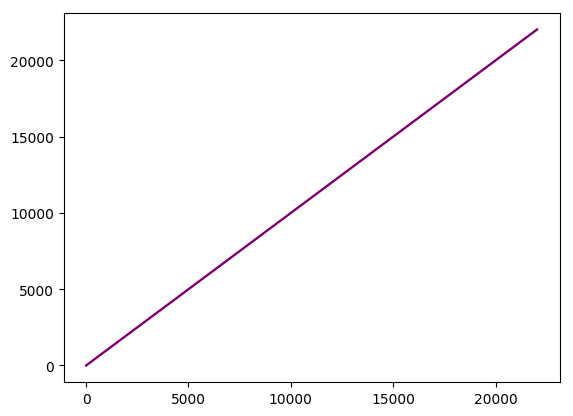

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f757028eed0>

In [70]:
MetodoRunge5(f5,1,1,0,0.01,10,1,0,1,0) #* $a=c=1$, $b=d=0$


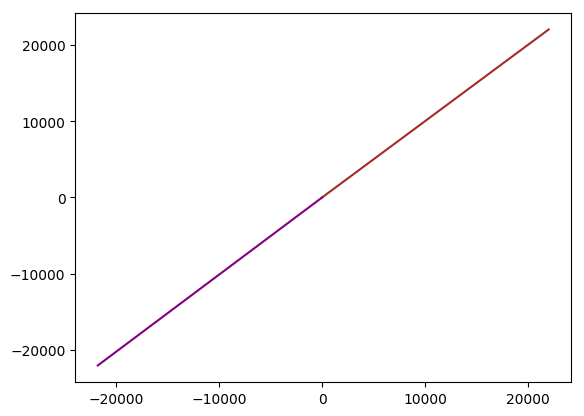

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7570166090>

In [71]:
MetodoRunge5(f5,1,1,0,0.01,10,1,0,-1,0) #* $a=c=-1$, $b=d=0$


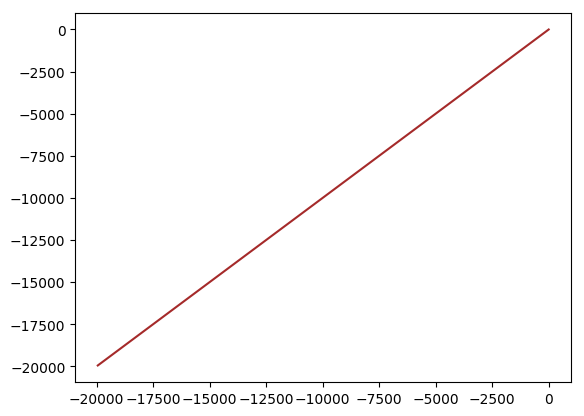

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f75702ff1d0>

In [72]:
MetodoRunge5(f5,1,1,0,0.01,10,1,-2,0,0) #* $a=1$, $b=-2$, $c=d=0$


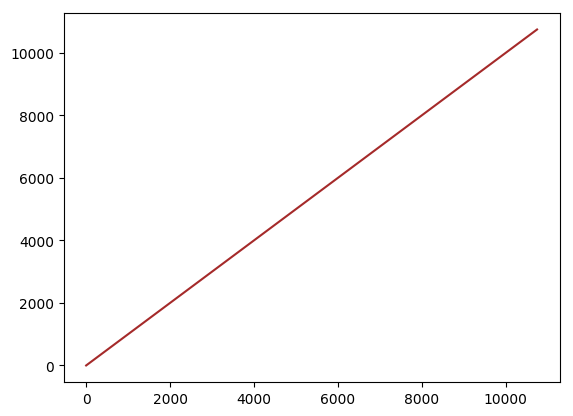

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f75701a1690>

In [73]:
MetodoRunge5(f5,1,1,0,0.01,10,1,-0.5,0,0) #* $a=1$, $b=-0.5$, $c=d=0$


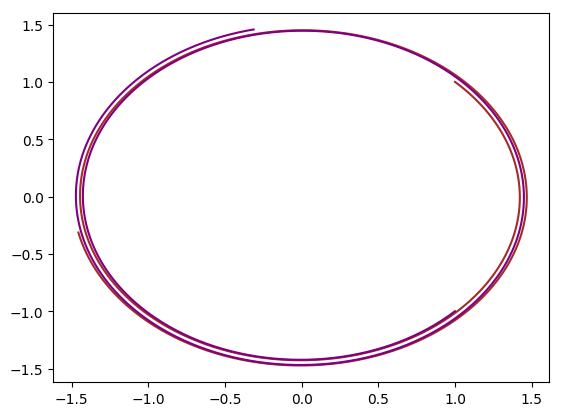

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f756f90a4d0>

In [74]:
MetodoRunge5(f5,1,1,0,0.01,10,0,1,-1,0) #* $a=d=0$, $b=-c=1$


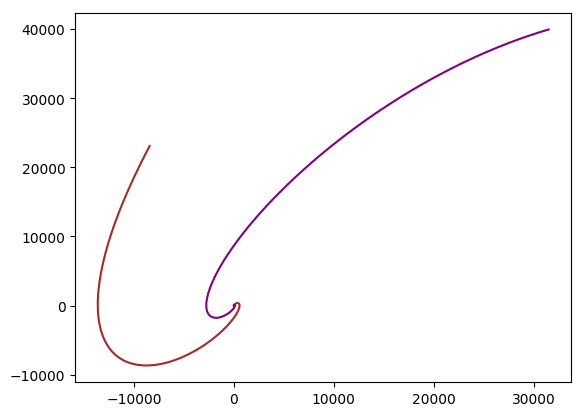

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f756fdefcd0>

In [79]:
MetodoRunge5(f5,1,-1,0,0.01,10,1,1,-1,1) #* $a=d=1$, $b=-c=1$


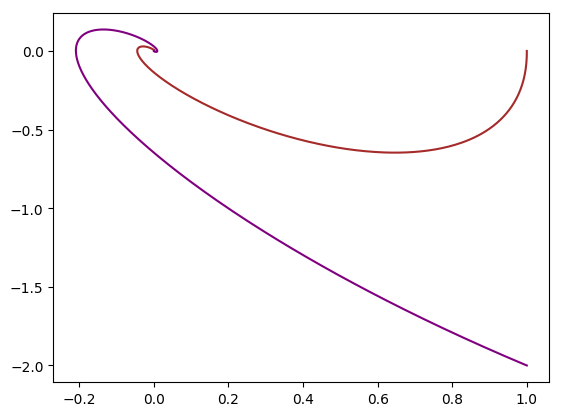

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f757125ec90>

In [76]:
MetodoRunge5(f5,1,1,0,0.01,10,-1,1,-1,-1) #* $a=d=-1$, $b=-c=1$


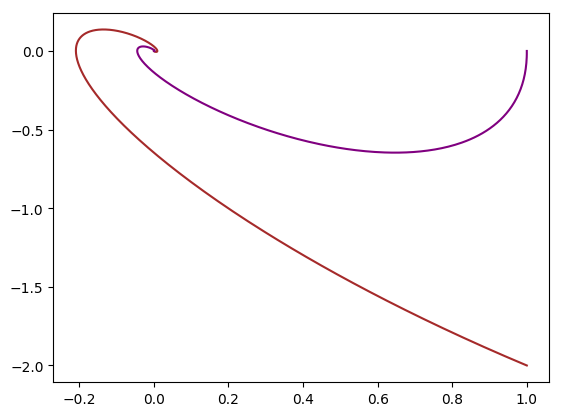

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f757140fd90>

In [77]:
MetodoRunge5(f5,1,1,0,0.01,10,-1,-1,1,-1) #* $a=d=-1$, $b=-c=-1$


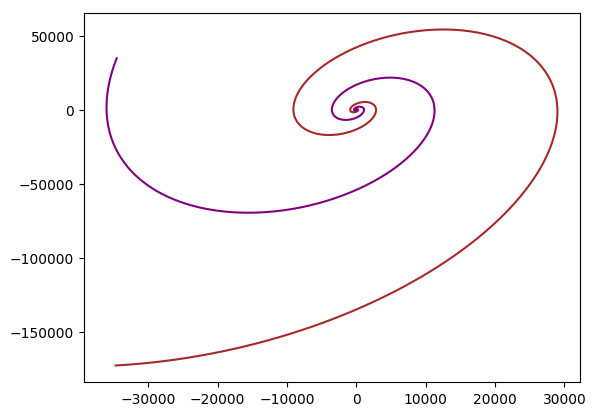

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f756ff05350>

In [78]:
MetodoRunge5(f5,1,1,0,0.01,10,1,4,-2,1) #* $a=d=1$, $b=4,c=-2$


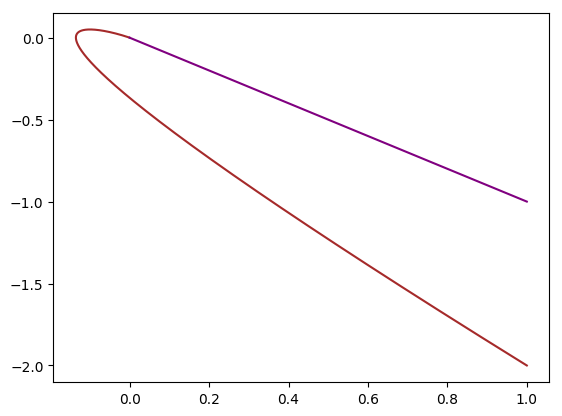

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f756fe22390>

In [80]:
MetodoRunge5(f5,1,1,0,0.01,10,-1,-1,0,-1) #* $a=b=d=-1$, $c=0$